# Exercise 2.2

*The exercises in this IPython notebook are based on the exercises of Chapter 13 of [Easly and Kleinberg (2010)][1].*

Consider the graph from Figure 13.8 from Chapter 13 of [Easly and Kleinberg][1] about the structure of the web, which shows a set of eighteen web pages where hyperlinks between web pages form a directed graph.

![Example graph][2]

Now, let's load the same graph from the file `'figure13-8.dot'`.

[1]: http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch13.pdf "Chapter 13, The Structure of the Web"
[2]: http://wwwhome.ewi.utwente.nl/~hiemstra/images/figure13-8-EaslyKleinberg.png "Figure 13.8"

In [3]:
import networkx as nx # use 'nx' as a shorthand for networkx

dot_graph = """
strict digraph G {
1 -> 8;
3 -> 8;
4 -> { 1 3 5 };
5 -> 10;
6 -> { 2 7 };
7 -> 8;
8 -> 13;
9 -> { 3 4 15 };
11 -> 7;
12 -> 13;
13 -> 14;
14 -> 9;
15 -> { 14 16 18 };
16 -> 10;
17 -> 16;
18 -> 13;
}
"""

f = open('figure13-8.dot', 'w') 
f.write(dot_graph)
f.close()

G = nx.DiGraph(nx.read_dot('figure13-8.dot'))

## Exercise 2.2.0: Bonus (do this exercise after you finished the notebook)

(a) Add or delete an edge from the graph so as to increase the size of the largest strongly connected component.

(b) Add or delete an edge from the graph so as to increase the size of the set IN.

(c) Add or delete an edge from the graph so as to increase the size of the set OUT.

*Tip: Use `G.add_edge('99', '98')`*

**Beware:**: *The node labels should be strings, so you have to use quotes.*

In [2]:
# add or delete edges here when you worked through the notebook all the way at the end.

Let's display `G` using IPython's display Image function:

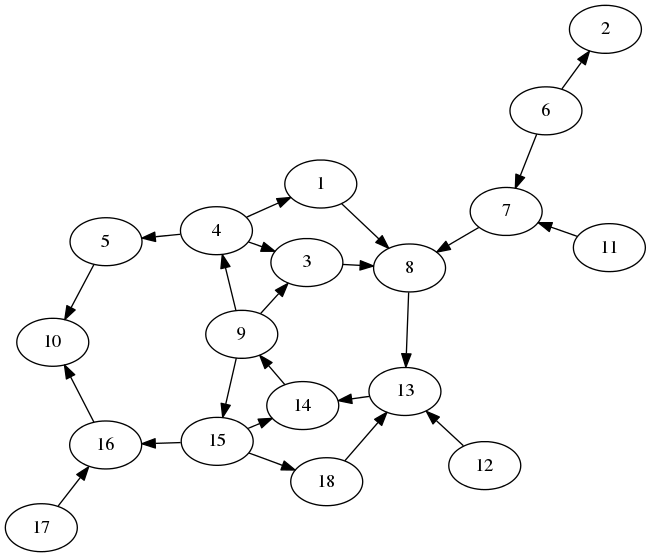

In [12]:
import IPython

viz = nx.to_agraph(G)
viz.layout()
viz.draw('figure13-8.png')

IPython.display.Image('figure13-8.png')

Exercise 2.2.1: strongly connected components
------------------
Use the NetworkX function that computes all strongly connected components (see the [NetworkX documentation][1]). This function produces a generator object of sets of nodes (see Exercise 2.1). Loop over the sets that are generated by the generator object to make a iterator object (a list), and assign this to the variable `scc` (we want to use `scc` multiple times).

*Tip: Make yourself familiar with the [Reference documentation][2].*

[1]: http://networkx.github.io/documentation/networkx-1.10/ "NetworkX 1.10 documentation"
[2]: http://networkx.github.io/documentation/networkx-1.10/reference/ "NetworkX 1.10 reference"

In [4]:
# begin of solution
scc = [c for c in nx.strongly_connected_components(G)]
# end of solution
scc   # show the contents of scc

[{'10'},
 {'16'},
 {'5'},
 {'1', '13', '14', '15', '18', '3', '4', '8', '9'},
 {'7'},
 {'11'},
 {'12'},
 {'17'},
 {'2'},
 {'6'}]

Exercise 2.2.2: the largest strongly connected component
------------------------
Write a function `largest_component(components)` that takes as input the set of strongly connected components, and selects the largest component. Note that the size of a component ``c`` is determined by the Python command ``len(c)``

In [5]:
def largest_component(components):
    largest = set()

    # begin of solution
    max_len = 0
    for comp in components:
        if (len(comp) > max_len):
            max_len  = len(comp)
            largest = comp
    # end of solution
    return largest
    
giant_scc = largest_component(scc)
giant_scc   # show the giant strongly connected component

{'1', '13', '14', '15', '18', '3', '4', '8', '9'}

## Exercise 2.2.3: can one component reach another?

The Bow-Tie structure of the web consists of the giant strongly connected component, and sets of nodes called: *IN*, *OUT*, *Tendrils*, *Tubes*, and *Disconnected*.
The sets of nodes IN, OUT, Tendrils, etc. are defined by the fact that nodes in them **can reach** nodes from another component. Note that if one node from a strongly connected component `c1` can reach one node of another strongly connected component `c2`, then all nodes from `c1` can reach all nodes from `c2` (Why?). 

Write a function `can_reach(c1, c2)` that takes two components `c1` and `c2`, and returns True if the first component can reach the second component, and False otherwise

*Tip 1: Make use of the depth-first search implementation of NetworkX.*

*Tip 2: Look at the pseudo code just above Exercise 2.1.4 if you need more inspiration.*

In [8]:
def can_reach(graph, c1, c2):
    # begin of solution
    for n1 in c1: 
        for n in nx.dfs_preorder_nodes(graph, n1):
            if (n in c2):
                return True
    return False
    # end of solution

## Exercise 2.2.4: IN and OUT nodes

Let's use the Python variables `inc` for the set of nodes in the IN component (`in` is a reserved word in Python) and `outc` for the set of nodes in the OUT component. Write code that checks for every strongly connected component whether its nodes belong to IN (or OUT), and if they do, add the nodes to `inc` (or `outc`). You can merge two sets by using the method [union][1]. 

*Tip 1: Use the function `can_reach(graph, c1, c2)` in your implementation.*

*Tip 2: Curly braces or the `set()` function can be used to create sets. To create an empty set you have to use `set()`, not `{}`; the latter creates an empty dictionary.*

[1]: https://docs.python.org/2.7/tutorial/datastructures.html#sets "Python sets"


In [9]:
inc  = set()
outc = set()

for c in scc:
    # begin of solution
    c_reaches_scc = can_reach(G, c, giant_scc)
    scc_reaches_c = can_reach(G, giant_scc, c)
    if (c_reaches_scc and not scc_reaches_c):
        inc = inc.union(c)
    if (scc_reaches_c and not c_reaches_scc):
        outc = outc.union(c)
    # end of solution

inc, outc   # show nodes of the IN component and the OUT component 

({'11', '12', '6', '7'}, {'10', '16', '5'})

## Exercise 2.2.5: Tendrils, Tubes and Disconnected nodes

Write code that checks for every strongly connected component whether its nodes belong to the Tendrils (`tendrilc`), Tubes(`tubec`) and Disconnected nodes (`disconnectedc`).

**Beware:** When you implement this, you might note that the definition of Tendrils by Easly and Kleinberg is not complete. What would be a more complete definition?


In [10]:
tendrilc = set()
tubec = set()
disconnectedc = set()

for c in scc:
    # begin of solution
    c_reaches_scc  = can_reach(G, c, giant_scc)
    scc_reaches_c  = can_reach(G, giant_scc, c)
    c_reaches_outc = can_reach(G, c, outc)
    outc_reaches_c = can_reach(G, outc, c)
    inc_reaches_c  = can_reach(G, inc, c)
    c_reaches_inc  = can_reach(G, c, inc)       
    
    tendril_a = inc_reaches_c and not c_reaches_scc and not outc_reaches_c
    tendril_b = c_reaches_outc and not scc_reaches_c and not c_reaches_inc
        
    if (tendril_a and tendril_b):
        tubec = tubec.union(c)
    elif (tendril_a or tendril_b):
        tendrilc = tendrilc.union(c)
    elif (not c_reaches_scc and not scc_reaches_c):
        disconnectedc = disconnectedc.union(c)
    # end of solution
        
tendrilc, tubec, disconnectedc  # show tendrils, tubes and disconnected nodes

({'17', '2'}, set(), set())

## Project: The UTwente web graph

Download the UTwente web graph from Blackboard, and compute its Bow-tie structure.
Write a normal Python program (so no IPython notebook) to check whether the UT Web graph also has a Bow-tie structure.

This is a very big graph that might be too big for your system to handle. 
There are two versions of the graph on Blackboard: `utwente201509.dot` and `utwente201509small.dot`: The latter does not contain the URLs, making it somewhat easier to handle for NetworkX.